In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, decomposition
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE

In [70]:
iris = datasets.load_iris()

X = iris.data
y = iris.target

In [71]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [72]:
X_df = pd.DataFrame(X, columns=iris.feature_names)

In [73]:
X_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [74]:
X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [75]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Text(0.5, 0, 'petal length')

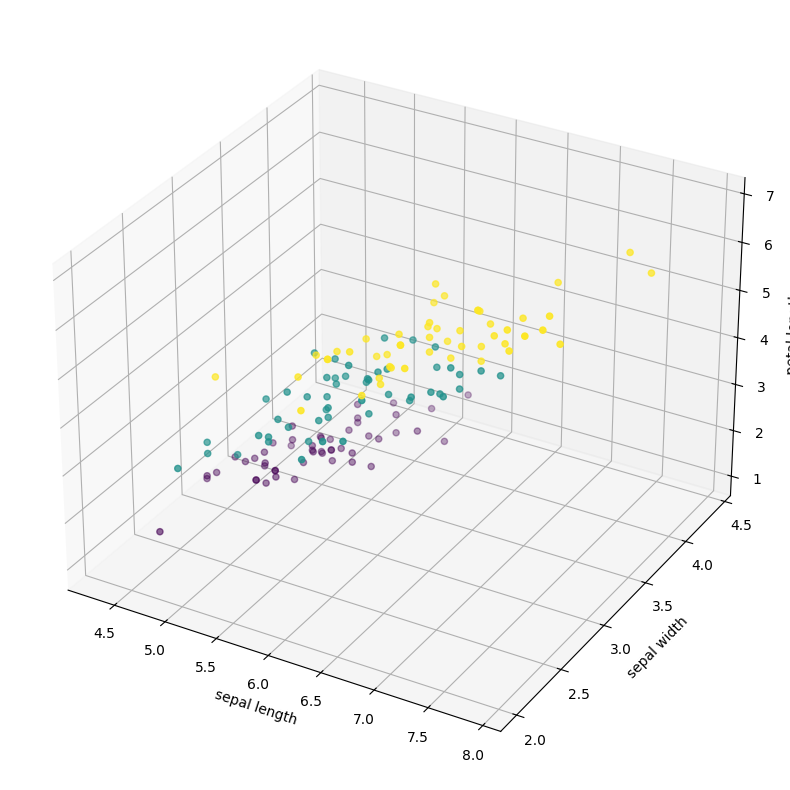

In [76]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.set_xlabel('sepal length')
ax.set_ylabel('sepal width')
ax.set_zlabel('petal length')

In [77]:
#scaler = StandardScaler()
#X_processed = scaler.fit_transform(X)
#
#pca = PCA(n_components=2)
#X_pca = pca.fit_transform(X_processed)

In [78]:
X.shape

(150, 4)

In [79]:
X_pca.shape

(150, 2)

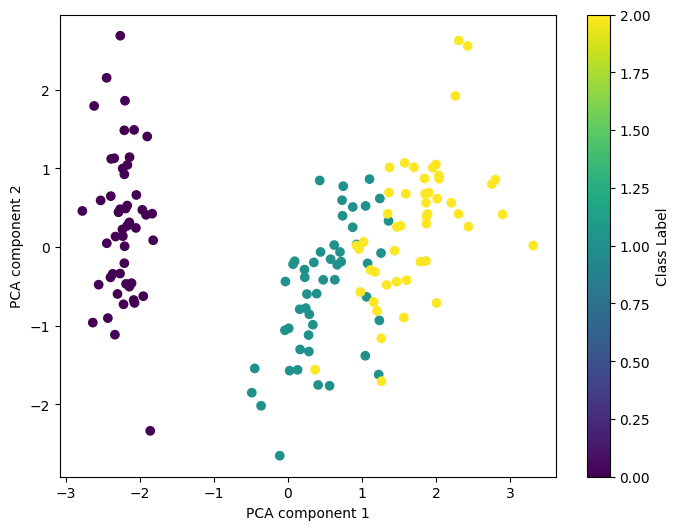

In [80]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.colorbar(scatter, label='Class Label')
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')
plt.show()

In [81]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, stratify=y_train_val, random_state=42)

In [82]:
X_train.shape, X_val.shape, X_test.shape

((90, 4), (30, 4), (30, 4))

In [83]:
model = DecisionTreeClassifier(max_depth=2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

accuracy_score(y_val, y_pred)

0.9

In [84]:
scaler = StandardScaler()
X_train_processed = scaler.fit_transform(X_train)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_processed)

In [85]:
X_val_processed = scaler.transform(X_val)
X_val_pca = pca.transform(X_val_processed)
model = model = DecisionTreeClassifier(max_depth=2, random_state=42)
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_val_pca)

accuracy_score(y_val, y_pred)

0.9333333333333333

In [86]:
digits = datasets.load_digits()

In [87]:
X = digits.data
y = digits.target

In [88]:
X.shape

(1797, 64)

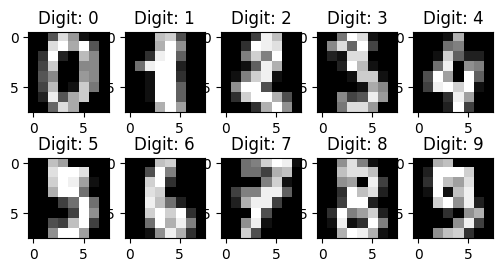

In [93]:
plt.figure(figsize=(6, 3))

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X[i, :].reshape([8, 8]), cmap='gray')
    plt.title('Digit: ' + str(y[i]))

In [95]:
pca = PCA(n_components=2)
X_scaled = scaler.fit_transform(X)
X_pca = pca.fit_transform(X_scaled)
X_pca.shape, X.shape

((1797, 2), (1797, 64))

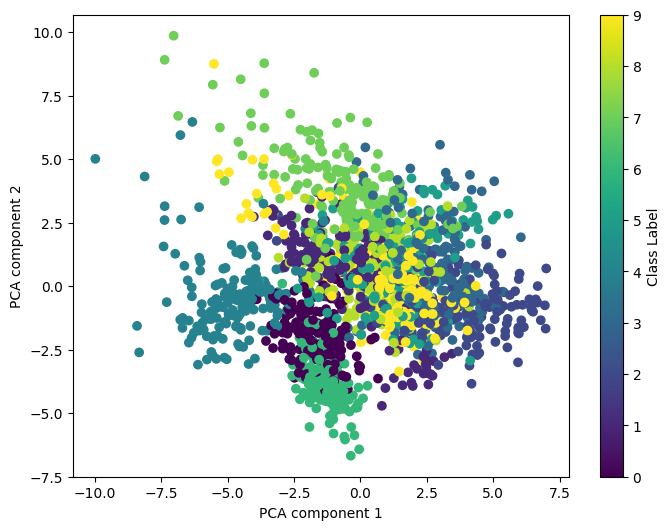

In [96]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.colorbar(scatter, label='Class Label')
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')
plt.show()

In [98]:
pca = PCA().fit(X_scaled)

np.cumsum(pca.explained_variance_ratio_)

array([0.12033916, 0.21594971, 0.30039385, 0.36537793, 0.41397948,
       0.45612068, 0.49554151, 0.52943532, 0.55941753, 0.58873755,
       0.61655561, 0.64232616, 0.66507919, 0.68735099, 0.70900328,
       0.72814495, 0.74590042, 0.76228111, 0.77824572, 0.79313763,
       0.80661732, 0.81933664, 0.83099501, 0.84157148, 0.85132464,
       0.86077023, 0.86940036, 0.87776679, 0.88574372, 0.89320844,
       0.90046426, 0.90738337, 0.91392246, 0.92033038, 0.92624422,
       0.93195585, 0.93719222, 0.94201029, 0.94654748, 0.95077911,
       0.95483964, 0.95881049, 0.96237542, 0.9657833 , 0.96906165,
       0.97217197, 0.97505772, 0.97782262, 0.98041436, 0.98275919,
       0.98494176, 0.98697774, 0.98893286, 0.99076605, 0.99244551,
       0.99405787, 0.9955355 , 0.99688668, 0.99813769, 0.99917465,
       1.        , 1.        , 1.        , 1.        ])

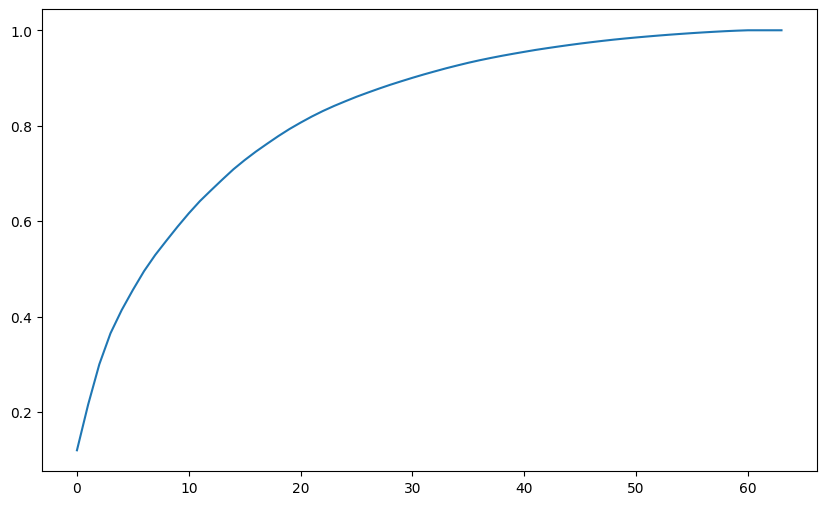

In [99]:
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [102]:
tsne = TSNE()
X_tsne = tsne.fit_transform(X)

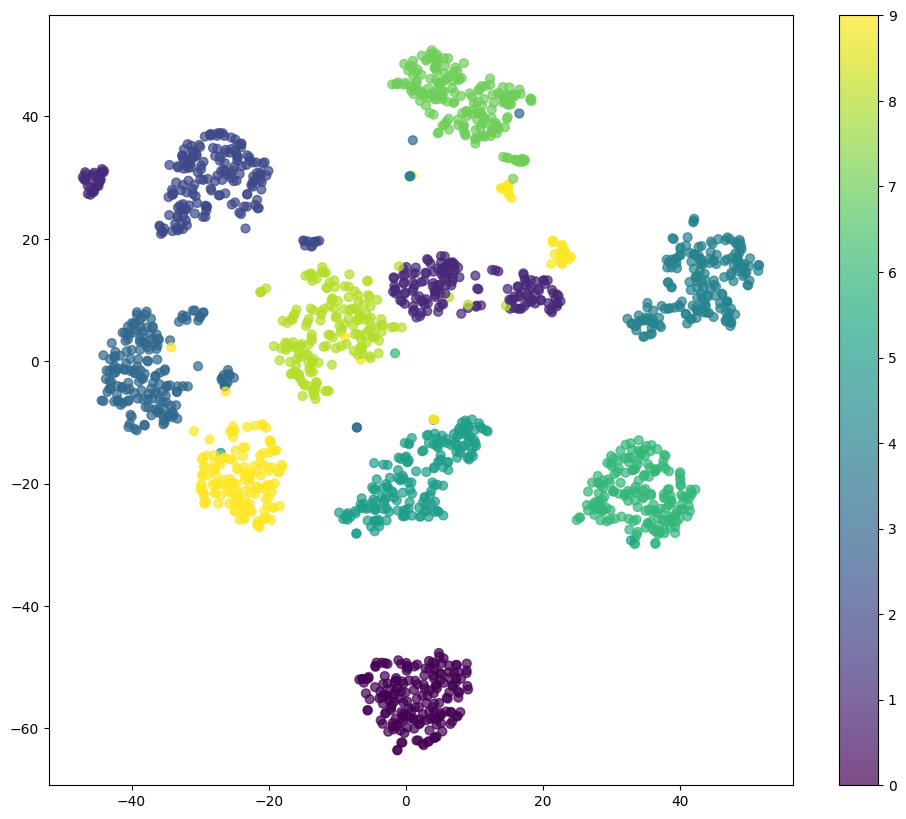

In [104]:
plt.figure(figsize=(12, 10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, s=40, alpha=0.7)
plt.colorbar()